In [ ]:
# https://www.quantamagazine.org/after-nearly-a-century-a-new-limit-for-patterns-in-graphs-20230502/

In [ ]:
#Analyzing Stock Prices Using Graph Theory
#Data Collection: Gather daily closing prices for the stocks you're interested in (e.g., "AMZN", "LNC", "PTGX", etc.).

#Creating the Graph:
#Each stock is a node in the graph.
#Edges are drawn between nodes (stocks) based on a chosen relationship, like correlated price movements.
#Edge Coloring:

#Apply colors to edges based on criteria, such as whether two stocks’ prices both go up, both go down, or diverge on a given day.
#You could also use more complex criteria, like the degree of correlation between their movements.
#Pattern Detection:

#Use Ramsey theory principles to look for unavoidable patterns in the graph, such as subsets of stocks that consistently show similar behaviors.
#These patterns might be indicative of underlying market forces or sector behaviors.
#Interpreting Results:

#Patterns can give insights into correlations and potentially predictive behaviors in the stock market.
#Be cautious, as stock markets are influenced by a myriad of factors, and patterns may not always imply causation

[*********************100%%**********************]  6 of 6 completed


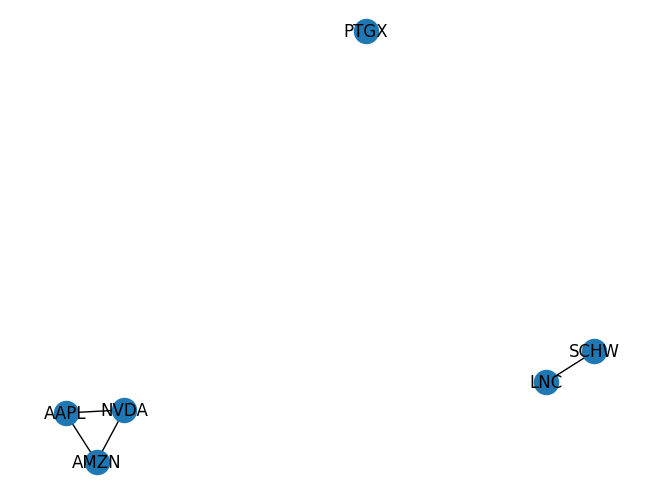

In [4]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt

# Fetch stock data
stocks = ["AMZN", "LNC", "PTGX", "SCHW","AAPL","NVDA",""]
data = yf.download(stocks, start="2023-01-01", end="2023-12-18")['Adj Close']

# Create a graph
G = nx.Graph()
for stock in stocks:
    G.add_node(stock)

# Add edges based on some criteria
# Here we just use a simple correlation example
for i in range(len(stocks)):
    for j in range(i+1, len(stocks)):
        correlation = data[stocks[i]].corr(data[stocks[j]])
        if correlation > 0.5:  # Arbitrary threshold for strong correlation
            G.add_edge(stocks[i], stocks[j], weight=correlation)

# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()


[*********************100%%**********************]  3 of 3 completed


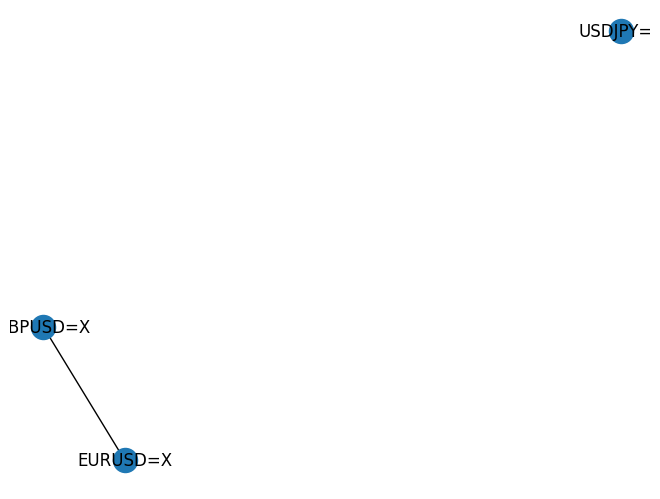

In [13]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt

# Fetch stock data
stocks = ["EURUSD=X", "GBPUSD=X", "USDJPY=X"]#,"AUDUSD=X","NZDUSD=X","USDCHF=X","USDCAD=X","GC=F","TH","NVDA","PTGX","HRMY"]
data = yf.download(stocks, start="2023-01-01", end="2023-12-18")['Adj Close']

# Create a graph
G = nx.Graph()
for stock in stocks:
    G.add_node(stock)

# Add edges based on some criteria
# Here we just use a simple correlation example
for i in range(len(stocks)):
    for j in range(i+1, len(stocks)):
        correlation = data[stocks[i]].corr(data[stocks[j]])
        if correlation > 0.5:  # Arbitrary threshold for strong correlation
            G.add_edge(stocks[i], stocks[j], weight=correlation)

# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()

In [15]:
#Advanced Analysis Using Ramsey Theory Concepts
#Defining Homogeneity: Decide what constitutes homogeneous behavior among stocks. For instance, stocks might be considered
#homogeneous if their price movements are consistently correlated above a certain threshold over a period.
#Creating the Graph:
#Continue using the daily closing prices of stocks.
#Create a graph where each node is a stock, and edges represent significant correlation between the stock price movements.
#Finding Homogeneous Subgraphs:
#Apply a Ramsey-theory-like approach to find all subsets of nodes (stocks) where every pair of nodes within the subset is connected (i.e., the stocks are consistently correlated).
#This is akin to finding complete subgraphs (cliques) in graph terminology.
#Interpreting the Results:
#Homogeneous subgraphs represent groups of stocks that tend to move together under the defined criteria.
#These groups might indicate market sectors that are behaving similarly or reveal underlying market dynamics.

[*********************100%%**********************]  5 of 5 completed
Complete subgraphs (cliques) representing homogeneous stock behaviors:
['SCHW', 'LNC']
['PTGX']
['AMZN', 'NVDA']


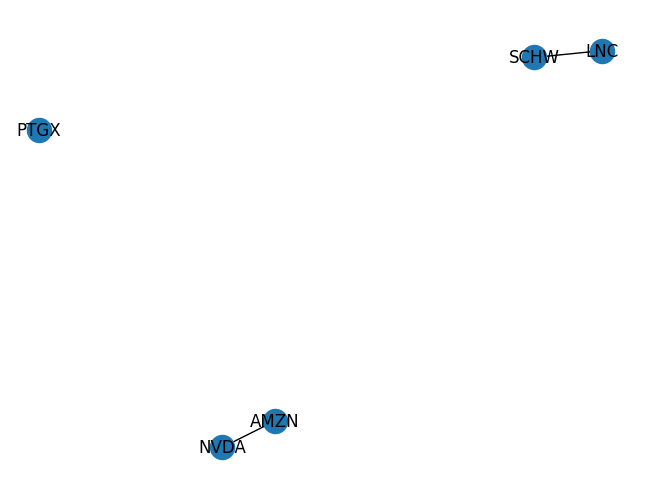

In [17]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt

# Fetch stock data
stocks = ["AMZN", "LNC", "PTGX", "SCHW","NVDA"]
data = yf.download(stocks, start="2023-01-01", end="2023-12-31")['Adj Close']

# Create a graph
G = nx.Graph()
for stock in stocks:
    G.add_node(stock)

# Add edges based on correlation criteria
for i in range(len(stocks)):
    for j in range(i+1, len(stocks)):
        correlation = data[stocks[i]].corr(data[stocks[j]])
        if correlation > 0.5:  # Threshold for strong correlation
            G.add_edge(stocks[i], stocks[j], weight=correlation)

# Find cliques (complete subgraphs)
cliques = list(nx.find_cliques(G))
print("Complete subgraphs (cliques) representing homogeneous stock behaviors:")
for clique in cliques:
    print(clique)
# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()


In [ ]:
#Incorporating temporal dynamics and more sophisticated definitions of stock price relationships into the analysis requires 
#a more complex approach. The idea is to not only look at static correlations but also to observe how these relationships 
#evolve over time. We can do this by segmenting the data into different time windows and analyzing the graph patterns within 
#each window.Here's how you can modify the previous example to include temporal dynamics and a more nuanced approach to 
#defining stock relationships:

#Incorporating Temporal Dynamics
#Time Window Segmentation:
#Divide the stock price data into several time windows. For example, you could analyze the data month by month.
#This allows you to observe how the relationships between stocks change over time.
#Graph Analysis per Time Window:
#For each time window, create a correlation graph similar to the previous approach.
#Identify complete subgraphs (cliques) within each graph to see how groups of stocks that move together evolve.
#Tracking Changes Over Time:
#Observe how these cliques form, dissolve, or evolve through different time windows.
#This can reveal more dynamic relationships between stocks.

In [19]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Fetch stock data
stocks = ["AAPL", "LNC", "NVDA", "PTGX", "SCHW"]
data = yf.download(stocks, start="2023-01-01", end="2023-12-31")['Adj Close']

# Function to create a graph from data
def create_graph(data):
    G = nx.Graph()
    for stock in stocks:
        G.add_node(stock)
    for i in range(len(stocks)):
        for j in range(i+1, len(stocks)):
            correlation = data[stocks[i]].corr(data[stocks[j]])
            if correlation > 0.5:  # Threshold for strong correlation
                G.add_edge(stocks[i], stocks[j], weight=correlation)
    return G

# Divide data into monthly windows
monthly_data = data.resample('M').mean()

# Analyze each month
for month in monthly_data.index:
    print(f"Month: {month.strftime('%Y-%m')}")
    month_data = data[data.index.month == month.month]
    G = create_graph(month_data)
    cliques = list(nx.find_cliques(G))
    print("Clique(s) for this month:")
    for clique in cliques:
        print(clique)
    # Optional: Visualize the graph for each month
    # nx.draw(G, with_labels=True)
    # plt.show()
    print("\n")


[*********************100%%**********************]  5 of 5 completed
Month: 2023-01
Clique(s) for this month:
['SCHW']
['LNC', 'AAPL', 'NVDA', 'PTGX']


Month: 2023-02
Clique(s) for this month:
['SCHW', 'PTGX']
['AAPL', 'LNC']
['NVDA']


Month: 2023-03
Clique(s) for this month:
['SCHW', 'LNC']
['AAPL', 'NVDA']
['PTGX']


Month: 2023-04
Clique(s) for this month:
['PTGX', 'AAPL']
['PTGX', 'SCHW']
['LNC', 'AAPL']
['LNC', 'SCHW']
['LNC', 'NVDA']


Month: 2023-05
Clique(s) for this month:
['SCHW', 'AAPL', 'NVDA']
['SCHW', 'LNC']
['PTGX', 'AAPL', 'NVDA']


Month: 2023-06
Clique(s) for this month:
['PTGX']
['LNC', 'AAPL', 'NVDA']
['LNC', 'SCHW']


Month: 2023-07
Clique(s) for this month:
['SCHW', 'AAPL', 'NVDA', 'LNC']
['PTGX']


Month: 2023-08
Clique(s) for this month:
['NVDA', 'PTGX']
['LNC', 'AAPL']
['LNC', 'SCHW']


Month: 2023-09
Clique(s) for this month:
['SCHW', 'AAPL', 'NVDA', 'PTGX']
['SCHW', 'AAPL', 'LNC']


Month: 2023-10
Clique(s) for this month:
['LNC', 'PTGX', 'AAPL', 'NVDA']
['

[*********************100%%**********************]  5 of 5 completed
Number of relationships (edges) in each time period:
Period 2023-01: 2 edges
Period 2023-02: 2 edges
Period 2023-03: 2 edges
Period 2023-04: 2 edges
Period 2023-05: 2 edges
Period 2023-06: 2 edges
Period 2023-07: 2 edges
Period 2023-08: 2 edges
Period 2023-09: 2 edges
Period 2023-10: 2 edges
Period 2023-11: 2 edges
Period 2023-12: 2 edges


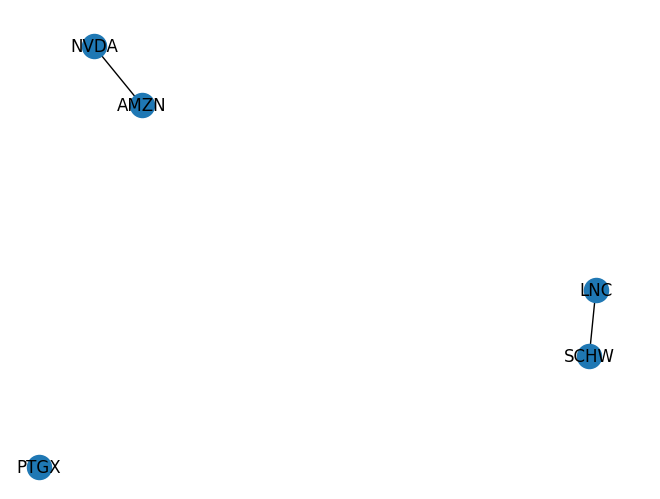

In [22]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Fetch stock data
stocks = ["AMZN", "LNC", "NVDA", "PTGX", "SCHW"]
data = yf.download(stocks, start="2023-01-01", end="2023-12-31")['Adj Close']

# Segment the data into time periods (e.g., monthly)
monthly_data = data.resample('M').mean()

# Function to create a graph for a given time period DataFrame
def create_correlation_graph(data_frame):
    G = nx.Graph()
    for stock in stocks:
        G.add_node(stock)

    for i in range(len(stocks)):
        for j in range(i+1, len(stocks)):
            correlation = data_frame[stocks[i]].corr(data_frame[stocks[j]])
            if correlation > 0.5:  # Threshold for strong correlation
                G.add_edge(stocks[i], stocks[j], weight=correlation)
    return G

# Analyze each time period
graphs = []
for _, period_data in monthly_data.iterrows():
    G = create_correlation_graph(monthly_data)
    graphs.append(G)

# Analyze changes over time
# For simplicity, just print the number of edges (relationships) in each period
print("Number of relationships (edges) in each time period:")
for i, G in enumerate(graphs):
    print(f"Period {monthly_data.index[i].strftime('%Y-%m')}: {G.number_of_edges()} edges")

# Visualize one of the graphs (e.g., the first month)
nx.draw(graphs[0], with_labels=True)
plt.show()
